In [1]:
from selenium import webdriver
import chromedriver_binary
from bs4 import BeautifulSoup as bs

In [2]:
import time
import re
from selenium.webdriver.chrome.options import Options
options=Options()
options.add_argument("--headless")


In [89]:
url="https://www.google.com"
key="https://mobile.twitter.com/explore"
driver=webdriver.Chrome()
driver.get(url)
time.sleep(3)
search=driver.find_element_by_name("q")
search.send_keys(key)
search.submit()
soup=bs(driver.page_source,"html.parser")
res=soup.find_all("h3",attrs={"class":"LC20lb DKV0Md"})
#<h3 class="LC20lb DKV0Md"><span>ウェブスクレイピング - Wikipedia</span></h3>
for i,j in enumerate(res):
    print(j.get_text())
time.sleep(20)
driver.quit()

Today - Twitter Moments
Explore (@Explorer) | Twitter
Twitter（ツイッター）を見るだけで利用する方法！アカウント ...
Twitter パソコンサイトを表示する - Tipsfound
Twitter in Opera | Tweet, explore, and get a better view on ...
Twitter - Apps on Google Play
‎Twitter on the App Store
Twitter rolls out Stories, aka 'Fleets,' to all users; will also test a ...
Changes Could be Coming for Twitter's Explore Page | Social ...


In [3]:
url="https://www.google.com"
key="https://twitter.com/login"
username=""
password=""
driver=webdriver.Chrome()
driver.get(key)
time.sleep(3)

user_form=driver.find_element_by_name("session[username_or_email]")
pass_form=driver.find_element_by_name("session[password]")

user_form.send_keys(username)
pass_form.send_keys(password)
pass_form.submit()

time.sleep(3)
text="このツイートはボットによって投稿されています。"

tweet_area=driver.find_element_by_class_name("public-DraftStyleDefault-block")
tweet_area.send_keys(text)

time.sleep(3)
driver.quit()

In [4]:
#東京　コロナ最新人数　抽出

url="https://www3.nhk.or.jp/news/special/coronavirus/number-tokyo/"
driver=webdriver.Chrome(options=options)
driver.get(url)
time.sleep(3)

soup=bs(driver.page_source,"html.parser")
res=soup.find_all("p",attrs={"class":"item__title"})
f=0
arr=[]
for i,j in enumerate(res):
    if f==0:
        arr.append(j.get_text())
        f=1
    else:
        break
time.sleep(1)
driver.quit()
data=[]
for i in arr:
    s=i.split(" ")
    text="".join(s)

    data.append(re.search(r'[0-9]+',str(text)).group())
print(data)

['460']


In [6]:
#自動ツイート　プログラム
options=Options()
options.add_argument("--headless")

url="https://www.google.com"
key="https://twitter.com/login"
username=""
password=""
driver=webdriver.Chrome(options=options)
driver.get(key)
time.sleep(3)


user_form=driver.find_element_by_name("session[username_or_email]")
pass_form=driver.find_element_by_name("session[password]")

user_form.send_keys(username)
pass_form.send_keys(password)
pass_form.submit()

time.sleep(3)
text="このツイートはボットによって投稿されています。"

tweet_area=driver.find_element_by_class_name("public-DraftStyleDefault-block")
tweet_area.send_keys(text)
tweet_button = driver.find_element_by_xpath('//*[@data-testid="tweetButtonInline"]')
tweet_button.click()

time.sleep(3)
driver.quit()

In [ ]:
#ツイッタートレンド取得

In [5]:
options=Options()
options.add_argument("--headless")

key="https://twitter.com/explore/tabs/trending"

#driver=webdriver.Chrome()
driver=webdriver.Chrome(options=options)
driver.get(key)
time.sleep(1)

#<span class="r-18u37iz"><span dir="ltr" class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">
soup=bs(driver.page_source,"html.parser")
res=soup.find_all("span",attrs={"class":"r-18u37iz"})
#<div aria-label="タイムライン: 話題を検索" class="css-1dbjc4n">
res=soup.find_all("div",attrs={"class":"css-1dbjc4n"})

arr=[]
f=0
for i,j in enumerate(res):
    if f==0:
        arr.append(j.get_text())
        f=1
    else:
        break
    
time.sleep(1)
driver.quit()

b=arr[0].split("日本のトレンド")

text=b[1].split("Twitterを使ってみよう")[0]
text=re.sub(r'[0-9]+,[0-9]+件のツイート',',',text)
text=re.sub(r'·+',',',text)
text=re.sub(r'![0-9]','_',text)
text=text.split(',')

trend_tag=[]
trend={}
for i in text:
    if re.match(r'[0-9]',i):
        continue
    else:
        if re.match(r'.トレンド',i):
            trend_tag.append(re.sub(r'.トレンド','',i))
        if re.match(r'トレンド',i):
            trend_tag.append(re.sub(r'トレンド','',i))

for i,j in enumerate(trend_tag):
    trend[i]=j
    print("{}:{}".format(i,j))

0:#あなたの苦手なタイプの人間を診断
1:ウェイ系陽キャ
2:リア充カップル
3:根暗コミュ障
4:ヤバめ地雷人間
5:#一番くじ呪術廻戦
6:レベルE
7:Switch版
8:西村再生相政治菅首相が14日夜に5人以上で会食 公明党・山口代表が苦言を呈す


In [ ]:
#データ処理

In [83]:
import pandas as pd
import openpyxl
import html5lib

In [105]:
#東京日ごとのpm2.5データ
url="https://tenki.jp/pm25/live/3/16/"
df=pd.read_html(url,encoding='utf-8')
print(df)
df[0].to_excel("data.xlsx",encoding="utf-8")

[           地点  測定値(μg/m3) 測定値(μg/m3).1  前1時間変化  注意目安
0    千代田区神田司町          18           18       ↓   ---
1      日比谷交差点          17           17       ↓   ---
2       中央区晴海          13           13       ↓   ---
3      永代通り新川          18           18       ↓   ---
4      第一京浜高輪          18           18       ↓   ---
..        ...         ...          ...     ...   ...
80  小金井街道東久留米          16           16       ↓   ---
81      多摩市愛宕          24           24       ↑   ---
82     東京環状長岡          21           21       ↓   ---
83   国設小笠原酸性雨           1            1       ↑   ---
84         地点  測定値(μg/m3)   測定値(μg/m3)  前1時間変化  注意目安

[85 rows x 5 columns]]


In [109]:
df[0][["地点","測定値(μg/m3)"]]

,地点,測定値(μg/m3)
0,千代田区神田司町,18
1,日比谷交差点,17
2,中央区晴海,13
3,永代通り新川,18
4,第一京浜高輪,18
...,...,...
80,小金井街道東久留米,16
81,多摩市愛宕,24
82,東京環状長岡,21
83,国設小笠原酸性雨,1


In [ ]:
#気象データ可視化

In [110]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url="https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662"
df=pd.read_html(url)
df=df[0].dropna()

In [111]:
df

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
1,1876,1.6,3.4 ),8.1,12.2,17.0,18.5,24.3,26.6,22.6 ),14.8 ),9.1,4.8,13.6
2,1877,3.2,3.6,6.2,13.6,16.5,22.0,26.5,25.9,21.3,15.9,9.6,5.8,14.2
3,1878,2.3,2.5,7.2,11.5,18.3,20.0,26.0,24.6,22.8,15.8,9.7,5.1,13.8
4,1879,3.2,5.4,8.0,12.6,18.0,21.4 ),26.1,26.6,21.3,15.0,9.7,8.0,14.6
5,1880,2.6,5.8,8.4,12.3,17.7,19.8,24.2,25.5,22.5,16.6,10.2,3.9,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2015,5.8,5.7,10.3,14.5,21.1,22.1,26.2,26.7,22.6,18.4,13.9,9.3,16.4
141,2016,6.1,7.2,10.1,15.4,20.2,22.4,25.4,27.1,24.4,18.7,11.4,8.9,16.4
142,2017,5.8,6.9,8.5,14.7,20.0,22.0,27.3,26.4,22.8,16.8,11.9,6.6,15.8
143,2018,4.7,5.4,11.5,17.0,19.8,22.4,28.3,28.1,22.9,19.1,14.0,8.3,16.8


<AxesSubplot:xlabel='年'>

c:\users\starc\anaconda3\envs\nnnnnnn\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\starc\anaconda3\envs\nnnnnnn\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\starc\anaconda3\envs\nnnnnnn\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\starc\anaconda3\envs\nnnnnnn\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


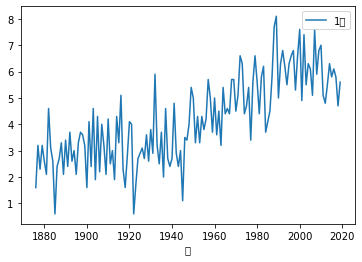

In [117]:
df.plot("年","1月")

In [116]:
%matplotlib inline
#%matplotlib notebook 動的画像

In [7]:
#スマホ通知
from notify_run import Notify

no=Notify()
no.register()

Endpoint: https://notify.run/j8DY8f0i5xImjlYl
To subscribe, open: https://notify.run/c/j8DY8f0i5xImjlYl
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

In [122]:
no.send("テスト")